In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df=pd.read_csv('credit_score_cleaned_train.csv')

In [3]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [4]:
df.shape

(4028, 28)

In [5]:
# Drop irrelevant columns
unwanted_features = ['id', 'customer_id', 'name', 'ssn', 'month', 'type_of_loan']
df_cleaned = df.drop(columns=unwanted_features)
print("Remaining Features:", df_cleaned.columns)


Remaining Features: Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'credit_history_age', 'total_emi_per_month', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')


In [6]:
df_cleaned = df_cleaned.dropna()

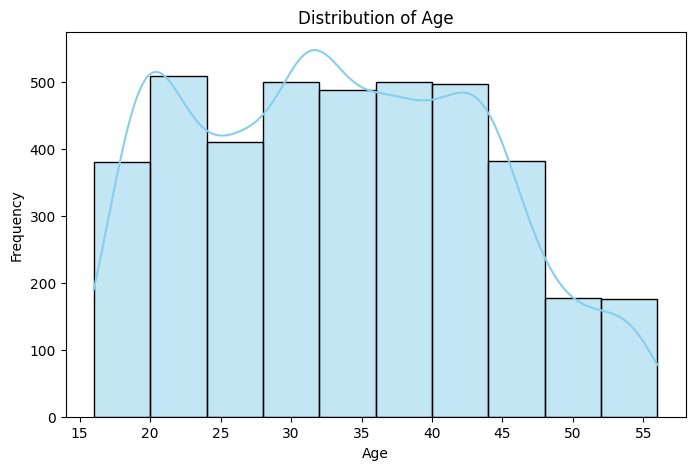

<ipython-input-7-a5c6d9242331>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y='annual_income', data=df_cleaned, palette='pastel')


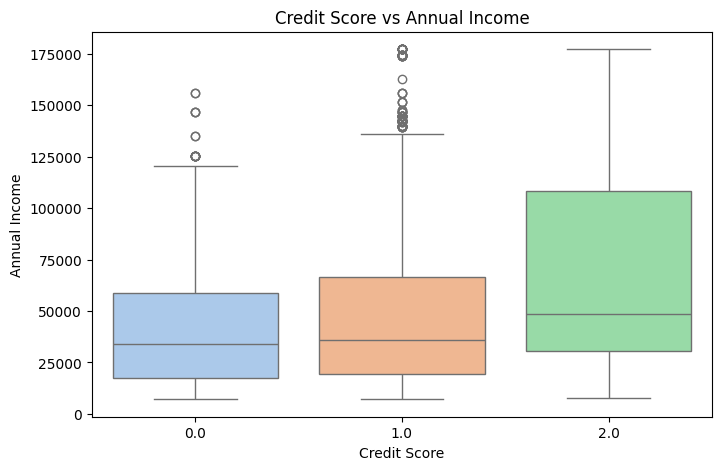

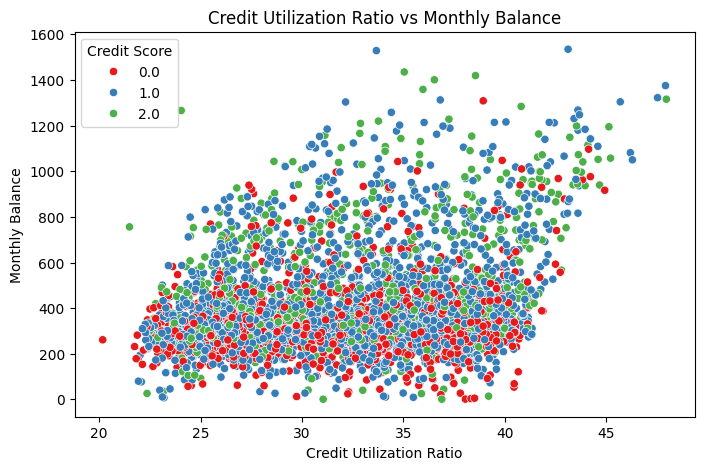

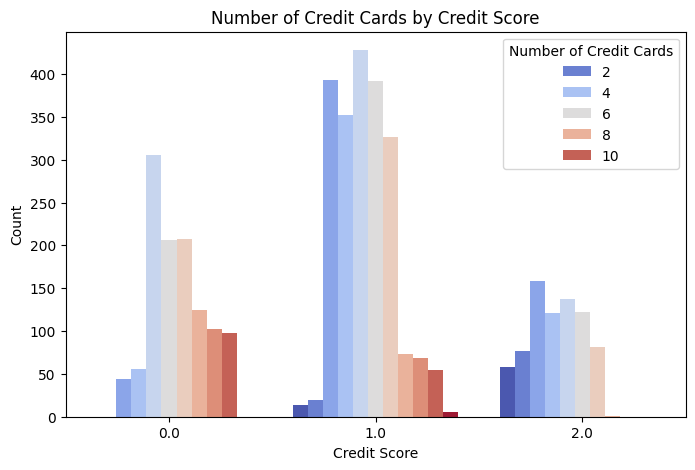

In [7]:
# Distribution of Age
import matplotlib.pyplot as plt

import seaborn as sns


plt.figure(figsize=(8, 5))

sns.histplot(df_cleaned['age'], kde=True, bins=10, color='skyblue')

plt.title('Distribution of Age')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.show()



# Credit Score vs Annual Income

plt.figure(figsize=(8, 5))

sns.boxplot(x='credit_score', y='annual_income', data=df_cleaned, palette='pastel')

plt.title('Credit Score vs Annual Income')

plt.xlabel('Credit Score')

plt.ylabel('Annual Income')

plt.show()



# Scatter Plot: Credit Utilization Ratio vs Monthly Balance

plt.figure(figsize=(8, 5))

sns.scatterplot(x='credit_utilization_ratio', y='monthly_balance', hue='credit_score', data=df_cleaned, palette='Set1')

plt.title('Credit Utilization Ratio vs Monthly Balance')

plt.xlabel('Credit Utilization Ratio')

plt.ylabel('Monthly Balance')

plt.legend(title='Credit Score')

plt.show()



# Count Plot: Number of Credit Cards by Credit Score

plt.figure(figsize=(8, 5))

sns.countplot(x='credit_score', hue='num_credit_card', data=df_cleaned, palette='coolwarm')

plt.title('Number of Credit Cards by Credit Score')

plt.xlabel('Credit Score')

plt.ylabel('Count')

plt.legend(title='Number of Credit Cards')

plt.show()

<ipython-input-8-9b4911ae5cb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='credit_score', data=df_cleaned, palette='viridis')


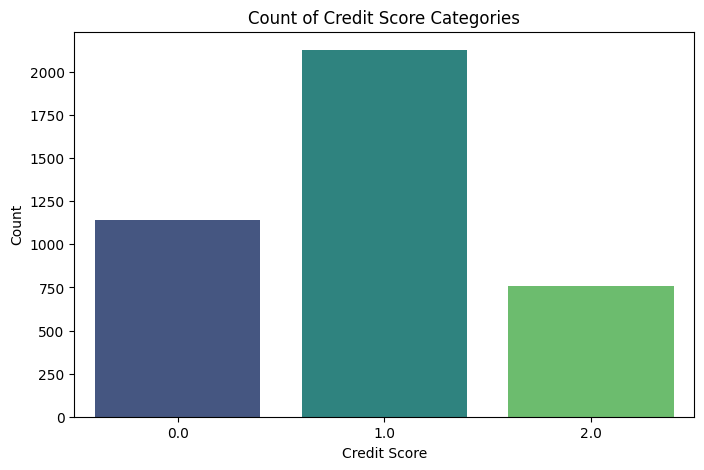

In [8]:
plt.figure(figsize=(8, 5))

sns.countplot(x='credit_score', data=df_cleaned, palette='viridis')

plt.title('Count of Credit Score Categories')

plt.xlabel('Credit Score')

plt.ylabel('Count')

plt.show()

In [9]:
X = df_cleaned.drop(columns=['credit_score'], errors='ignore')  # Features without the target

y = df_cleaned['credit_score']  # Target variable

In [10]:
# Identifying categorical and numerical features


categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Applying one-hot encoding to categorical features

X_one_hot_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)



# Standardizing numerical features

scaler = StandardScaler()

X_standardized = X_one_hot_encoded.copy()

X_standardized[numerical_features] = scaler.fit_transform(X_one_hot_encoded[numerical_features])



In [11]:
X_standardized.shape

(4027, 39)

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.3, random_state=42, stratify=y
)

# Encoding target variable
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Ensure all classes are known
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#1 Full dataset

In [13]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "LDA": LDA(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=500)
}

# Dictionary to store detailed results
detailed_results = []

# Training and evaluating models with precision, recall, and F1-score
for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)  # Fitting the model
    y_pred = model.predict(X_test)
    # Calculating classification metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    detailed_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Creating a DataFrame for detailed results
detailed_results_df = pd.DataFrame(detailed_results)

# Displaying detailed results
print(detailed_results_df)

                   Model  Accuracy  Precision    Recall  F1-Score
0    Logistic Regression  0.669148   0.668089  0.669148  0.663561
1                    LDA  0.658395   0.676257  0.658395  0.659308
2          Decision Tree  0.752688   0.752218  0.752688  0.752307
3          Random Forest  0.816377   0.816747  0.816377  0.816378
4  Multilayer Perceptron  0.768404   0.768121  0.768404  0.768116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


2.PCA

In [14]:
# Re-import necessary libraries after reset
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming `X_standardized` and `y` are preprocessed and ready

# Perform PCA to reduce dimensionality, retaining 80% variance
pca = PCA(n_components=0.8, random_state=42)
X_pca = pca.fit_transform(X_standardized)

X_pca.shape


(4027, 10)

In [15]:
# Splitting the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Encoding target variable (LabelEncoder should already be defined)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "LDA": LDA(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=500)
}

# Dictionary to store detailed results after PCA
pca_results = []

# Training and evaluating models on PCA-reduced data
for model_name, model in models.items():
    model.fit(X_train_pca, y_train_encoded)  # Fitting the model
    y_pred_pca = model.predict(X_test_pca)
    # Calculating metrics
    accuracy = accuracy_score(y_test_encoded, y_pred_pca)
    precision = precision_score(y_test_encoded, y_pred_pca, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred_pca, average='weighted', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred_pca, average='weighted', zero_division=0)
    pca_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Create a DataFrame for results
pca_results_df = pd.DataFrame(pca_results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
pca_results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.619520,0.616231,0.619520,0.610987
1,LDA,0.621175,0.624280,0.621175,0.620006
2,Decision Tree,0.640199,0.639408,0.640199,0.639723
3,Random Forest,0.737800,0.738004,0.737800,0.736791
4,Multilayer Perceptron,0.736973,0.736713,0.736973,0.735417


3 variable impotance

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are defined
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Rank features
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_ranking)


                                              Feature  Importance
13                                   outstanding_debt    0.090174
3                                  credit_history_age    0.073398
7                                       interest_rate    0.066080
9                                 delay_from_due_date    0.055393
31                                    credit_mix_Good    0.052047
16                                    monthly_balance    0.050858
10                             num_of_delayed_payment    0.049229
14                           credit_utilization_ratio    0.048397
11                               changed_credit_limit    0.047811
15                            amount_invested_monthly    0.044707
32                                credit_mix_Standard    0.041393
12                               num_credit_inquiries    0.037536
4                                 total_emi_per_month    0.037427
6                                     num_credit_card    0.035862
1         

Accuracy with 1 features: 0.7866004962779156
Accuracy with 2 features: 0.7229114971050455
Accuracy with 3 features: 0.7890818858560794
Accuracy with 4 features: 0.7832919768403639
Accuracy with 5 features: 0.7956989247311828
Accuracy with 6 features: 0.7841191066997518
Accuracy with 7 features: 0.7741935483870968
Accuracy with 8 features: 0.7700578990901572
Accuracy with 9 features: 0.7725392886683209
Accuracy with 10 features: 0.7725392886683209
Accuracy with 11 features: 0.7758478081058726
Accuracy with 12 features: 0.7725392886683209
Accuracy with 13 features: 0.7981803143093466
Accuracy with 14 features: 0.8006617038875103
Accuracy with 15 features: 0.80479735318445
Accuracy with 16 features: 0.8056244830438379
Accuracy with 17 features: 0.8072787427626137
Accuracy with 18 features: 0.8114143920595533
Accuracy with 19 features: 0.7998345740281224
Accuracy with 20 features: 0.8105872622001654
Accuracy with 21 features: 0.8072787427626137
Accuracy with 22 features: 0.8039702233250621

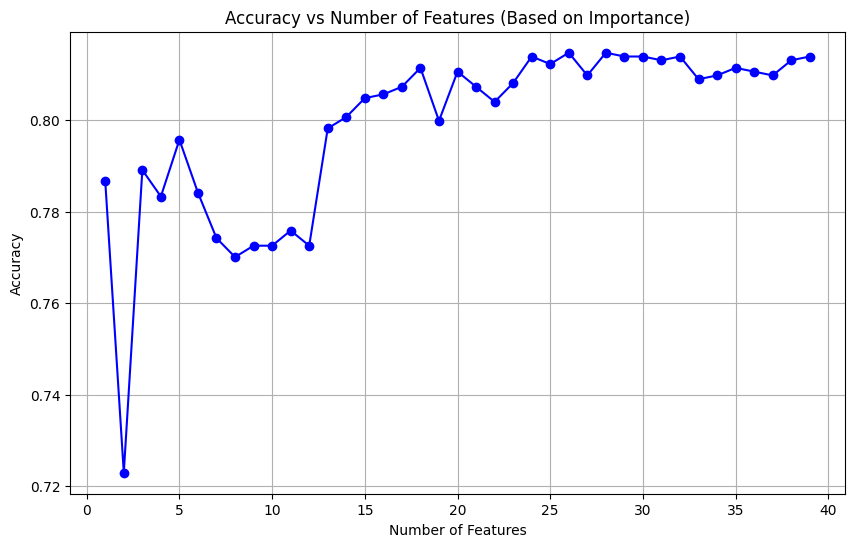

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are already defined

# Step 1: Train a Random Forest model to get feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to rank features
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 2: Evaluate model accuracy as features are added based on importance
accuracies = []
num_features = list(range(1, len(feature_ranking) + 1))

for i in num_features:
    # Select top i features
    selected_features = feature_ranking['Feature'].head(i)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train and evaluate a Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_selected, y_train)
    y_pred = rf_model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy with {i} features: {acc}")

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Features (Based on Importance)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


now select 1,2,3 and 10 to 20 features only and apply above all models

In [19]:
# Selecting specific features based on importance rankings: top 1, 2, 3, and 10-20
selected_features = list(feature_ranking['Feature'].iloc[[0, 1, 2]].values) + \
                    list(feature_ranking['Feature'].iloc[9:20].values)

# Reducing the dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Reinitializing models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "LDA": LDA(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=500)
}

# Dictionary to store results
selected_features_results = []

# Training and evaluating models with selected features
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Fitting the model
    y_pred = model.predict(X_test_selected)
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    selected_features_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Create a DataFrame for results
selected_features_results_df = pd.DataFrame(selected_features_results)

selected_features_results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.649297,0.648358,0.649297,0.644872
1,LDA,0.646816,0.665662,0.646816,0.647640
2,Decision Tree,0.753515,0.753138,0.753515,0.753176
3,Random Forest,0.807279,0.808959,0.807279,0.807367
4,Multilayer Perceptron,0.776675,0.777384,0.776675,0.775988


In [20]:
X_test_selected.shape

(1209, 14)

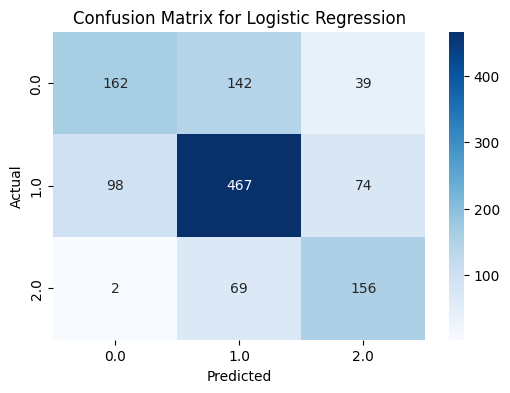

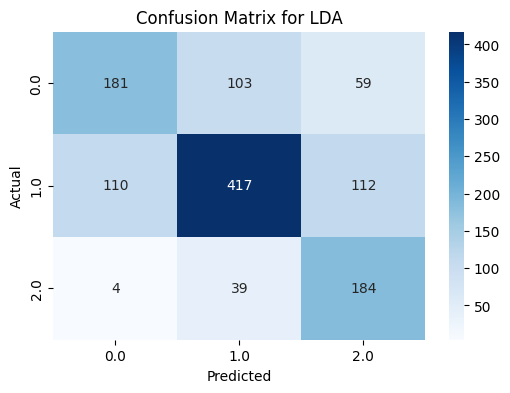

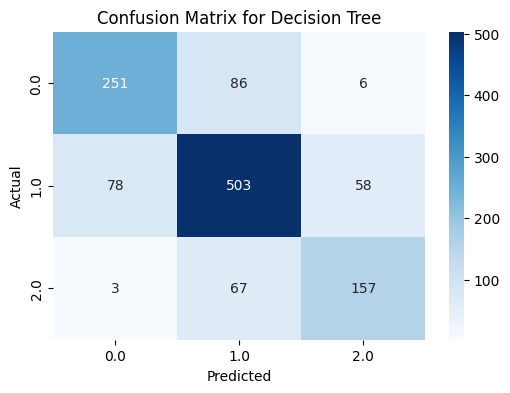

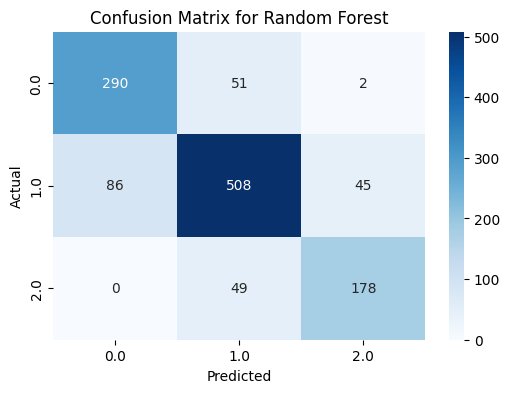

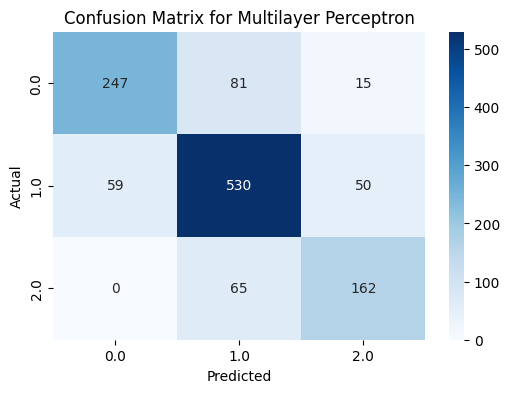

In [21]:
# Confusion matrices
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "LDA": LDA(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=500)
}

# Re-training the models to ensure consistency
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)

# Dictionary to store confusion matrices
confusion_matrices = {}

# Generate confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_selected)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Class Balance

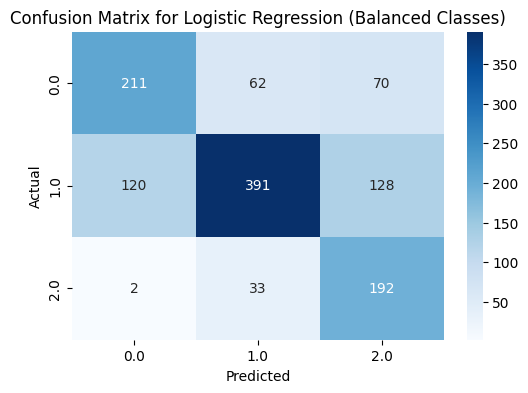

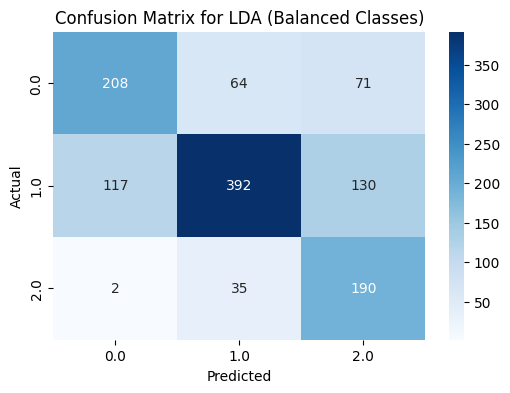

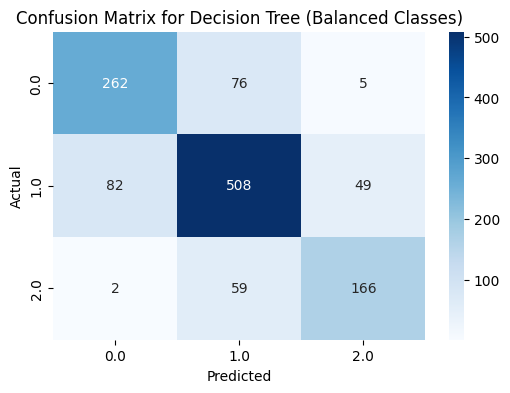

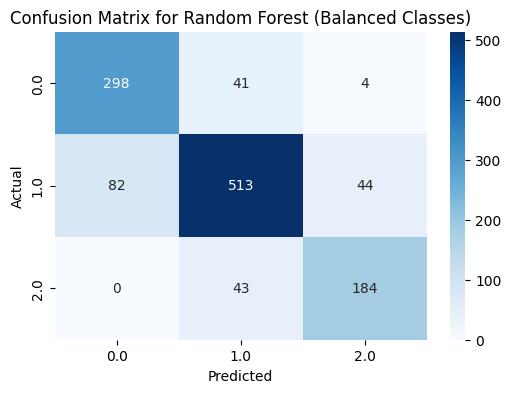

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


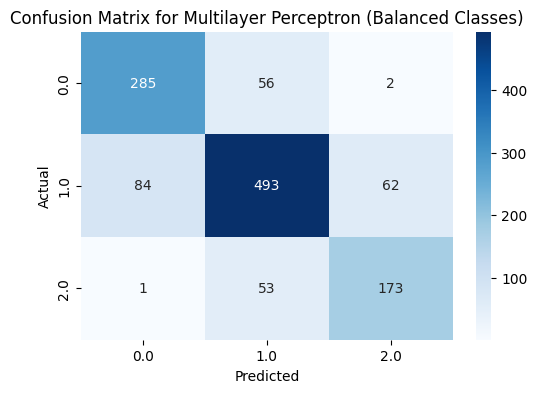

                   Model  Accuracy  Precision    Recall  F1-Score
0    Logistic Regression  0.656741   0.697422  0.656741  0.661352
1                    LDA  0.653433   0.693667  0.653433  0.658303
2          Decision Tree  0.774194   0.774069  0.774194  0.774089
3          Random Forest  0.822994   0.825566  0.822994  0.823141
4  Multilayer Perceptron  0.786600   0.788423  0.786600  0.786748


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_selected, y_train, X_test_selected, and y_test are already defined

# Step 1: Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Step 2: Reinitialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "LDA": LDA(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=500)
}

# Step 3: Train models and collect metrics
balanced_results = []
confusion_matrices = {}

for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # Train on balanced data
    y_pred = model.predict(X_test_selected)  # Predict on original test set

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    balanced_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name} (Balanced Classes)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 4: Create and display results DataFrame
balanced_results_df = pd.DataFrame(balanced_results)
print(balanced_results_df)


# Combining predictions from multiple models (e.g., stacking)

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train_selected, y_train, X_test_selected, and y_test are already defined

# Define base models
base_models = [
    ('log_reg', LogisticRegression(random_state=42, max_iter=500)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('mlp', MLPClassifier(random_state=42, max_iter=500))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42, max_iter=500)

# Initialize stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model
stacking_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_stack = stacking_clf.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_stack)
precision = precision_score(y_test, y_pred_stack, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_stack, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_stack, average='weighted', zero_division=0)

# Display results
stacking_results = pd.DataFrame([{
    "Model": "Stacking",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}])

print(stacking_results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

      Model  Accuracy  Precision    Recall  F1-Score
0  Stacking  0.823821   0.825897  0.823821  0.823955


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Clustering

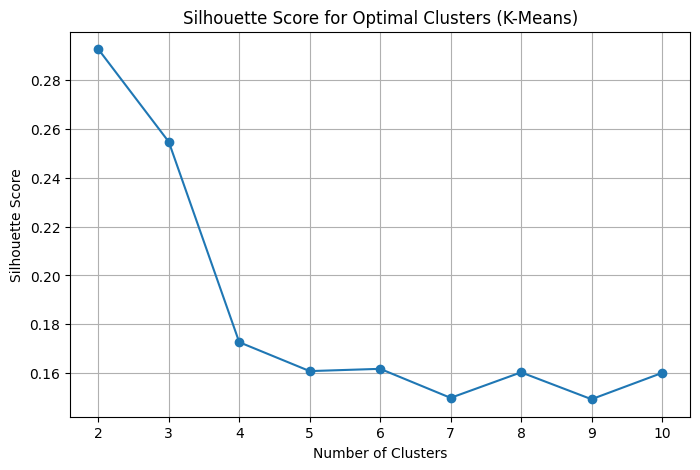

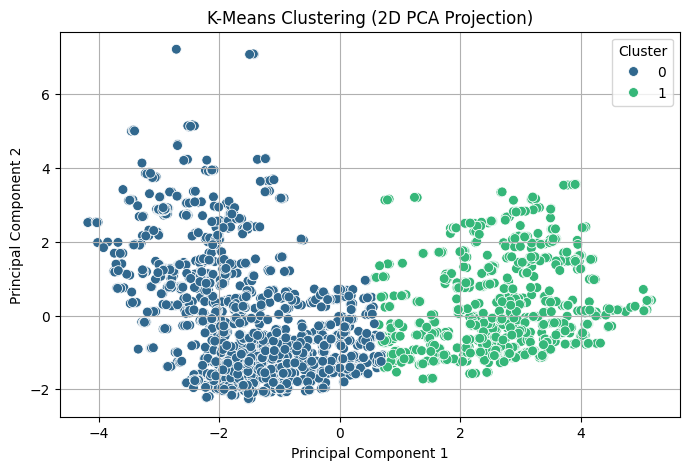

Cluster Centers (K-Means):
         outstanding_debt  credit_history_age  interest_rate  \
Cluster                                                        
0               -0.550266            0.517844      -0.558197   
1                1.018996           -0.954173       1.041469   

         amount_invested_monthly  credit_mix_Standard  num_credit_inquiries  \
Cluster                                                                       
0                       0.010728             0.509131             -0.558403   
1                      -0.022744             0.344214              1.044823   

         total_emi_per_month  num_credit_card  annual_income  \
Cluster                                                        
0                  -0.141366        -0.418576       0.212115   
1                   0.221575         0.766888      -0.431694   

         monthly_inhand_salary       age  num_bank_accounts  num_of_loan  \
Cluster                                                           

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessed data (use X_standardized or selected features)
X_cluster = X_train_selected.copy()

# 1. Optimal number of clusters using Silhouette Analysis for K-Means
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_cluster)
    sil_scores.append(silhouette_score(X_cluster, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 2. K-Means Clustering with optimal clusters
optimal_clusters = sil_scores.index(max(sil_scores)) + 2  # Add 2 because range starts at 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Add labels to the dataset
X_cluster['Cluster'] = kmeans_labels

# 3. Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_cluster.fit_predict(X_cluster.drop(columns=['Cluster']))

# Add labels for Agglomerative Clustering
X_cluster['Agglomerative Cluster'] = agg_labels

# 4. Cluster Statistics
cluster_stats = X_cluster.groupby('Cluster').mean()
cluster_std = X_cluster.groupby('Cluster').std()

# 5. Visualize Clusters in 2D (using PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster.drop(columns=['Cluster', 'Agglomerative Cluster']))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Explanation: Top features contributing to clusters
top_features = np.argsort(np.abs(pca.components_), axis=1)[:, :3]
feature_names = X_cluster.columns[:-2]  # Exclude cluster labels
pca_features = [[feature_names[i] for i in top_features[j]] for j in range(2)]

print("Cluster Centers (K-Means):")
print(cluster_stats)

print("\nCluster Standard Deviations (K-Means):")
print(cluster_std)

print("\nTop Features Contributing to PCA Components:")
for i, features in enumerate(pca_features, 1):
    print(f"Principal Component {i}: {', '.join(features)}")


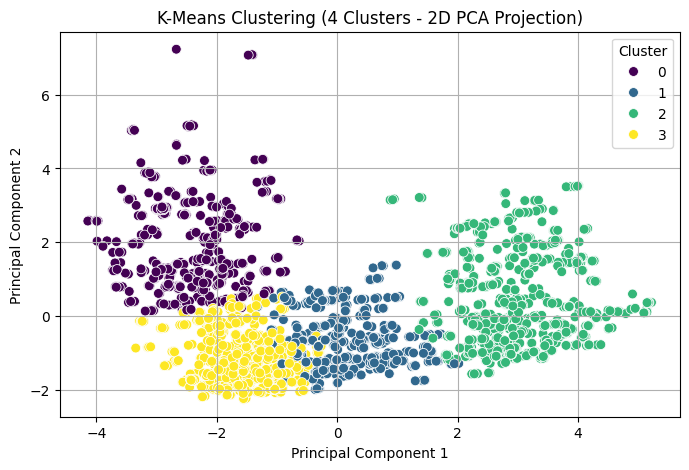

Cluster Centers (Mean Values):
         outstanding_debt  credit_history_age  interest_rate  \
Cluster                                                        
0               -0.608485            0.740926      -0.609648   
1               -0.280235           -0.362767      -0.114412   
2                1.219617           -1.008816       1.238302   
3               -0.582187            0.724930      -0.699184   

         amount_invested_monthly  credit_mix_Standard  num_credit_inquiries  \
Cluster                                                                       
0                       0.111846             0.376384             -0.770865   
1                      -0.102183             0.959578              0.237901   
2                      -0.008935             0.240807              1.140036   
3                       0.001672             0.364583             -0.730702   

         total_emi_per_month  num_credit_card  annual_income  \
Cluster                                      

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming preprocessed data is in X_cluster (selected features only)

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to the dataset
X_cluster['Cluster'] = kmeans_labels

# Calculate cluster statistics
cluster_stats = X_cluster.groupby('Cluster').mean()
cluster_std = X_cluster.groupby('Cluster').std()

# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster.drop(columns=['Cluster']))

# Plotting clusters in 2D
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('K-Means Clustering (4 Clusters - 2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Explanation of clusters using PCA components
top_features = np.argsort(np.abs(pca.components_), axis=1)[:, :3]
feature_names = X_cluster.columns[:-1]  # Exclude 'Cluster'
pca_features = [[feature_names[i] for i in top_features[j]] for j in range(2)]

print("Cluster Centers (Mean Values):")
print(cluster_stats)



print("\nTop Features Contributing to PCA Components:")
for i, features in enumerate(pca_features, 1):
    print(f"Principal Component {i}: {', '.join(features)}")


In [34]:
print("Cluster Centers (Mean Values):")
cluster_stats

Cluster Centers (Mean Values):


,outstanding_debt,credit_history_age,interest_rate,amount_invested_monthly,credit_mix_Standard,num_credit_inquiries,total_emi_per_month,num_credit_card,annual_income,monthly_inhand_salary,age,num_bank_accounts,num_of_loan,payment_of_min_amount_Yes,Agglomerative Cluster
Cluster,,,,,,,,,,,,,,,
0,-0.608485,0.740926,-0.609648,0.111846,0.376384,-0.770865,0.572112,-0.533597,1.667867,1.665810,-0.094508,-0.669027,-0.623397,0.243542,0.000000
1,-0.280235,-0.362767,-0.114412,-0.102183,0.959578,0.237901,-0.280942,-0.234774,-0.478130,-0.485807,-0.017607,0.137378,0.035080,0.936731,0.015817
2,1.219617,-1.008816,1.238302,-0.008935,0.240807,1.140036,0.310521,0.899561,-0.393725,-0.395861,-0.348855,0.953008,1.107125,1.000000,0.948992
3,-0.582187,0.724930,-0.699184,0.001672,0.364583,-0.730702,-0.513233,-0.366409,-0.408762,-0.399732,0.393783,-0.603115,-0.670169,0.179398,0.000000


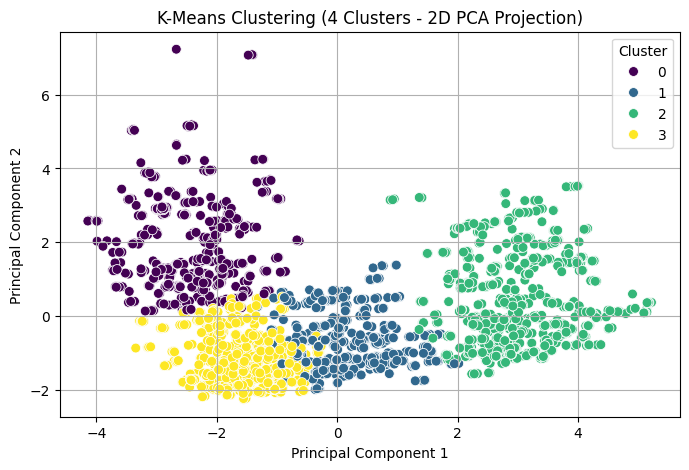

<ipython-input-39-3cb77705be4d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


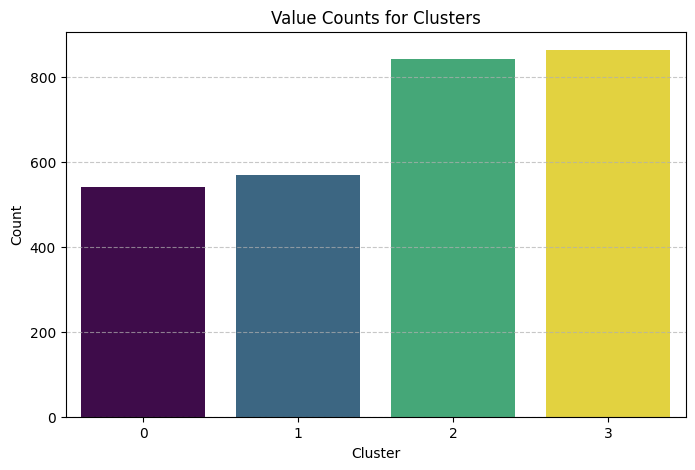

   Cluster  Count
0        0    542
1        1    569
2        2    843
3        3    864


In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_cluster is your preprocessed feature data (replace with your actual dataset)
# Example preprocessed data (replace with your actual dataset)
# X_cluster = <your preprocessed dataset>

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to the dataset
X_cluster['Cluster'] = kmeans_labels

# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster.drop(columns=['Cluster']))

# Plotting clusters in 2D
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=kmeans_labels,
    palette='viridis',
    s=50
)
plt.title('K-Means Clustering (4 Clusters - 2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Extract colors from scatter plot legend
scatter_palette = scatter.legend_.legend_handles  # Updated to legend_handles
cluster_colors = [handle.get_color() for handle in scatter_palette]  # Use get_color() for Line2D objects

# Value counts for clusters
cluster_counts = X_cluster['Cluster'].value_counts().sort_index()

# Plotting value counts with the same colors
plt.figure(figsize=(8, 5))
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette=cluster_colors  # Use the exact colors from scatter plot
)
plt.title('Value Counts for Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display cluster counts
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']
print(cluster_counts_df)


In [28]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=72a36e6f4b8b0384786436d0fe45c1f7f12f30478bf0c4c44ef2f2eaa8cbfd08
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
